### MODEL 5 Original 3 # 2
### Contains all fixed-before-conditional trials, regardless of interfering BL
### Combines A & C trials into single regressor
### Accounts for last three noisy volumes in Lvl 1 analysis (FSL ROI -- ExtractROI)

## Compares activation for regions of interest using binarized masks:
### Hippocampus (FS labels: hippocampus [17, 53])
### Dorsal caudate (hand-drawn by Mandy)
### Medial PFC (FS labels: rostral anterior cingulate [1026, 2026] & caudal anterior cingulate [1002, 2002])
### Dorsolateral PFC (Lausanne atlas: dlPFC)

In [1]:
from glob import glob

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

proj_dir = '/home/data/madlab/data/mri/wmaze'
 
mask_filenames = []
cope_files = []

# Obtain ROI masks & 2nd lvl cope files
for SID in sids:
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(mask_filenames_glob)

    subjcopes_glob = glob(proj_dir + '/scndlvl/wmaze_MRthesis/fixed_before_conditional/model5_1-3-2/' 
                          + SID + '/fixedfx/cope_*')
    cope_files.append(subjcopes_glob)
    #Check to make sure all cope files exist
    if len(cope_files[-1]) == 0:
        print(SID)

## Cell to double-check the array indexing

In [ ]:
print 'left hippocampus'
print(mask_filenames[0][0]) #lh-hippocampus
print 'left caudate'
print(mask_filenames[0][1]) #lh-caudate
print 'right caudate'
print(mask_filenames[0][2]) #rh-caudate
print 'right hippocampus'
print(mask_filenames[0][3]) #rh-hippocamus
print 'left putamen'
print(mask_filenames[0][4]) #lh-putamen
print 'right putamen'
print(mask_filenames[0][5]) #rh-putamen

print '-----'

print 'all_before_B_corr'
print(cope_files[0][0]) #all_before_B_corr
print 'all_before_B_incorr'
print(cope_files[0][1]) #all_before_B_incorr
print 'all_remaining'
print(cope_files[0][2]) #all_remaining
print 'all_corr_vs_all_incorr'
print(cope_files[0][3]) #all_corr_vs_all_incorr
print 'all_incorr_vs_all_corr'
print(cope_files[0][4]) #all_incorr_vs_all_corr



for i in cope_files:
    print(len(i))


### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [2]:
import nibabel as nb
import pandas as pd
import numpy as np


#Dictionary containing multiple arrays referenced by keywords
all_data = {'subjid':[],
            'lhhp_all_before_B_corr':[], 'rhhp_all_before_B_corr':[], 
            'lhhp_all_before_B_incorr':[], 'rhhp_all_before_B_incorr':[],
            'lhhp_all_remaining':[], 'rhhp_all_remaining':[],
            'lhhp_all_corr_vs_all_incorr':[], 'rhhp_all_corr_vs_all_incorr':[], 
            'lhhp_all_incorr_vs_all_corr':[], 'rhhp_all_incorr_vs_all_corr':[],
            
            'lhcaudate_all_before_B_corr':[], 'rhcaudate_all_before_B_corr':[], 
            'lhcaudate_all_before_B_incorr':[], 'rhcaudate_all_before_B_incorr':[],
            'lhcaudate_all_remaining':[], 'rhcaudate_all_remaining':[],
            'lhcaudate_all_corr_vs_all_incorr':[], 'rhcaudate_all_corr_vs_all_incorr':[], 
            'lhcaudate_all_incorr_vs_all_corr':[], 'rhcaudate_all_incorr_vs_all_corr':[],
            
            'lhputamen_all_before_B_corr':[], 'rhputamen_all_before_B_corr':[], 
            'lhputamen_all_before_B_incorr':[], 'rhputamen_all_before_B_incorr':[],
            'lhputamen_all_remaining':[], 'rhputamen_all_remaining':[],
            'lhputamen_all_corr_vs_all_incorr':[], 'rhputamen_all_corr_vs_all_incorr':[], 
            'lhputamen_all_incorr_vs_all_corr':[], 'rhputamen_all_incorr_vs_all_corr':[]}


# For each interation in the length of subject ids
for i in range(len(sids)):
    #Append the subject id
    all_data['subjid'].append(sids[i])
    #Load the left and right hippocampus mask files using Nibabel 
    lh_hp_img = nb.load(mask_filenames[i][0])
    rh_hp_img = nb.load(mask_filenames[i][3])
    lh_caudate_img = nb.load(mask_filenames[i][1])
    rh_caudate_img = nb.load(mask_filenames[i][2])
    lh_putamen_img = nb.load(mask_filenames[i][4])
    rh_putamen_img = nb.load(mask_filenames[i][5])

    
    #Load copes for individual trial types
    all_before_B_corr_img = nb.load(cope_files[i][0])
    all_before_B_incorr_img = nb.load(cope_files[i][1])
    all_remaining_img = nb.load(cope_files[i][2])
    all_corr_vs_all_incorr_img = nb.load(cope_files[i][3])
    all_incorr_vs_all_corr_img = nb.load(cope_files[i][4])

    
    
    ########################
    ### Left Hippocampus ###
    ########################
    
    # all_before_B_corr
    lh_hp_all_before_B_corr_data = all_before_B_corr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_all_before_B_corr'].append(np.mean(lh_hp_all_before_B_corr_data))
    
    # all_before_B_incorr
    lh_hp_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_all_before_B_incorr'].append(np.mean(lh_hp_all_before_B_incorr_data))
    
    # all_remaining
    lh_hp_all_remaining_data = all_remaining_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_all_remaining'].append(np.mean(lh_hp_all_remaining_data))
       
    # all_corr_vs_all_incorr
    lh_hp_all_corr_vs_all_incorr_data = all_corr_vs_all_incorr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_all_corr_vs_all_incorr'].append(np.mean(lh_hp_all_corr_vs_all_incorr_data)) 
    
    # all_incorr_vs_all_corr
    lh_hp_all_incorr_vs_all_corr_data = all_incorr_vs_all_corr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_all_incorr_vs_all_corr'].append(np.mean(lh_hp_all_incorr_vs_all_corr_data)) 

    
    #########################
    ### Right Hippocampus ###
    #########################
    
    # all_before_B_corr
    rh_hp_all_before_B_corr_data = all_before_B_corr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_all_before_B_corr'].append(np.mean(rh_hp_all_before_B_corr_data))

    # all_before_B_incorr
    rh_hp_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_all_before_B_incorr'].append(np.mean(rh_hp_all_before_B_incorr_data))

    # all_remaining
    rh_hp_all_remaining_data = all_remaining_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_all_remaining'].append(np.mean(rh_hp_all_remaining_data))

    # all_corr_vs_all_incorr
    rh_hp_all_corr_vs_all_incorr_data = all_corr_vs_all_incorr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_all_corr_vs_all_incorr'].append(np.mean(rh_hp_all_corr_vs_all_incorr_data)) 

    # all_incorr_vs_all_corr
    rh_hp_all_incorr_vs_all_corr_data = all_incorr_vs_all_corr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_all_incorr_vs_all_corr'].append(np.mean(rh_hp_all_incorr_vs_all_corr_data)) 

    
    ####################
    ### Left Caudate ###
    ####################
    
    # all_before_B_corr
    lh_caudate_all_before_B_corr_data = all_before_B_corr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_all_before_B_corr'].append(np.mean(lh_caudate_all_before_B_corr_data))
    
    # all_before_B_incorr
    lh_caudate_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_all_before_B_incorr'].append(np.mean(lh_caudate_all_before_B_incorr_data))
    
    # all_remaining
    lh_caudate_all_remaining_data = all_remaining_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_all_remaining'].append(np.mean(lh_caudate_all_remaining_data))
       
    # all_corr_vs_all_incorr
    lh_caudate_all_corr_vs_all_incorr_data = all_corr_vs_all_incorr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_all_corr_vs_all_incorr'].append(np.mean(lh_caudate_all_corr_vs_all_incorr_data)) 
    
    # all_incorr_vs_all_corr
    lh_caudate_all_incorr_vs_all_corr_data = all_incorr_vs_all_corr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_all_incorr_vs_all_corr'].append(np.mean(lh_caudate_all_incorr_vs_all_corr_data)) 
    
    
    #####################
    ### Right Caudate ###
    ##################### 
    
    # all_before_B_corr
    rh_caudate_all_before_B_corr_data = all_before_B_corr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_all_before_B_corr'].append(np.mean(rh_caudate_all_before_B_corr_data))

    # all_before_B_incorr
    rh_caudate_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_all_before_B_incorr'].append(np.mean(rh_caudate_all_before_B_incorr_data))

    # all_remaining
    rh_caudate_all_remaining_data = all_remaining_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_all_remaining'].append(np.mean(rh_caudate_all_remaining_data))

    # all_corr_vs_all_incorr
    rh_caudate_all_corr_vs_all_incorr_data = all_corr_vs_all_incorr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_all_corr_vs_all_incorr'].append(np.mean(rh_caudate_all_corr_vs_all_incorr_data)) 

    # all_incorr_vs_all_corr
    rh_caudate_all_incorr_vs_all_corr_data = all_incorr_vs_all_corr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_all_incorr_vs_all_corr'].append(np.mean(rh_caudate_all_incorr_vs_all_corr_data)) 
    
    
    ####################
    ### Left Putamen ###
    ####################
    
    # all_before_B_corr
    lh_putamen_all_before_B_corr_data = all_before_B_corr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_all_before_B_corr'].append(np.mean(lh_putamen_all_before_B_corr_data))
    
    # all_before_B_incorr
    lh_putamen_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_all_before_B_incorr'].append(np.mean(lh_putamen_all_before_B_incorr_data))
    
    # all_remaining
    lh_putamen_all_remaining_data = all_remaining_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_all_remaining'].append(np.mean(lh_putamen_all_remaining_data))
       
    # all_corr_vs_all_incorr
    lh_putamen_all_corr_vs_all_incorr_data = all_corr_vs_all_incorr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_all_corr_vs_all_incorr'].append(np.mean(lh_putamen_all_corr_vs_all_incorr_data)) 
    
    # all_incorr_vs_all_corr
    lh_putamen_all_incorr_vs_all_corr_data = all_incorr_vs_all_corr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_all_incorr_vs_all_corr'].append(np.mean(lh_putamen_all_incorr_vs_all_corr_data)) 
    
    
    #####################
    ### Right Putamen ###
    #####################
    
    # all_before_B_corr
    rh_putamen_all_before_B_corr_data = all_before_B_corr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_all_before_B_corr'].append(np.mean(rh_putamen_all_before_B_corr_data))

    # all_before_B_incorr
    rh_putamen_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_all_before_B_incorr'].append(np.mean(rh_putamen_all_before_B_incorr_data))

    # all_remaining
    rh_putamen_all_remaining_data = all_remaining_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_all_remaining'].append(np.mean(rh_putamen_all_remaining_data))

    # all_corr_vs_all_incorr
    rh_putamen_all_corr_vs_all_incorr_data = all_corr_vs_all_incorr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_all_corr_vs_all_incorr'].append(np.mean(rh_putamen_all_corr_vs_all_incorr_data)) 

    # all_incorr_vs_all_corr
    rh_putamen_all_incorr_vs_all_corr_data = all_incorr_vs_all_corr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_all_incorr_vs_all_corr'].append(np.mean(rh_putamen_all_incorr_vs_all_corr_data)) 

    
all_data_df = pd.DataFrame(all_data)

### Combine the two hemispheres to create one regional average

In [3]:
#Hippocampus average for each trial type
all_data_df['hp_all_before_B_corr'] = (all_data_df['lhhp_all_before_B_corr'] + 
                                       all_data_df['rhhp_all_before_B_corr'])/2.
all_data_df['hp_all_before_B_incorr'] = (all_data_df['lhhp_all_before_B_incorr'] + 
                                         all_data_df['rhhp_all_before_B_incorr'])/2.
all_data_df['hp_all_remaining'] = (all_data_df['lhhp_all_remaining'] + 
                                   all_data_df['rhhp_all_remaining'])/2.
all_data_df['hp_all_corr_vs_all_incorr'] = (all_data_df['lhhp_all_corr_vs_all_incorr'] + 
                                            all_data_df['rhhp_all_corr_vs_all_incorr'])/2.
all_data_df['hp_all_incorr_vs_all_corr'] = (all_data_df['lhhp_all_incorr_vs_all_corr'] + 
                                            all_data_df['rhhp_all_incorr_vs_all_corr'])/2.


#Caudate average for each trial type
all_data_df['caudate_all_before_B_corr'] = (all_data_df['lhcaudate_all_before_B_corr'] + 
                                            all_data_df['rhcaudate_all_before_B_corr'])/2.
all_data_df['caudate_all_before_B_incorr'] = (all_data_df['lhcaudate_all_before_B_incorr'] + 
                                              all_data_df['rhcaudate_all_before_B_incorr'])/2.
all_data_df['caudate_all_remaining'] = (all_data_df['lhcaudate_all_remaining'] + 
                                        all_data_df['rhcaudate_all_remaining'])/2.
all_data_df['caudate_all_corr_vs_all_incorr'] = (all_data_df['lhcaudate_all_corr_vs_all_incorr'] + 
                                                 all_data_df['rhcaudate_all_corr_vs_all_incorr'])/2.
all_data_df['caudate_all_incorr_vs_all_corr'] = (all_data_df['lhcaudate_all_incorr_vs_all_corr'] + 
                                                 all_data_df['rhcaudate_all_incorr_vs_all_corr'])/2.


#Putamen average for each trial type
all_data_df['putamen_all_before_B_corr'] = (all_data_df['lhputamen_all_before_B_corr'] + 
                                            all_data_df['rhputamen_all_before_B_corr'])/2.
all_data_df['putamen_all_before_B_incorr'] = (all_data_df['lhputamen_all_before_B_incorr'] + 
                                              all_data_df['rhputamen_all_before_B_incorr'])/2.
all_data_df['putamen_all_remaining'] = (all_data_df['lhputamen_all_remaining'] + 
                                        all_data_df['rhputamen_all_remaining'])/2.
all_data_df['putamen_all_corr_vs_all_incorr'] = (all_data_df['lhputamen_all_corr_vs_all_incorr'] + 
                                                 all_data_df['rhputamen_all_corr_vs_all_incorr'])/2.
all_data_df['putamen_all_incorr_vs_all_corr'] = (all_data_df['lhputamen_all_incorr_vs_all_corr'] + 
                                                 all_data_df['rhputamen_all_incorr_vs_all_corr'])/2.

## Hippocampus Activation: Fixed vs. Conditional Trials

In [20]:
from scipy import stats

print 'all_before_B_corr mean'
print np.mean(all_data_df['hp_all_before_B_corr'])
print 'all_before_B_incorr'
print np.mean(all_data_df['hp_all_before_B_incorr'])

print 'T-test: Hippocampus all_before_B_corr vs. all_before_B_incorr'
print stats.ttest_rel(all_data_df['hp_all_before_B_corr'], all_data_df['hp_all_before_B_incorr'])

all_before_B_corr mean
-0.707955261809
all_before_B_incorr
-1.23526448393
T-test: Hippocampus all_before_B_corr vs. all_before_B_incorr
Ttest_relResult(statistic=2.4280171250714093, pvalue=0.025284804604265066)


### Hippocampus Activation: All Before Correct vs. Incorrect Trials

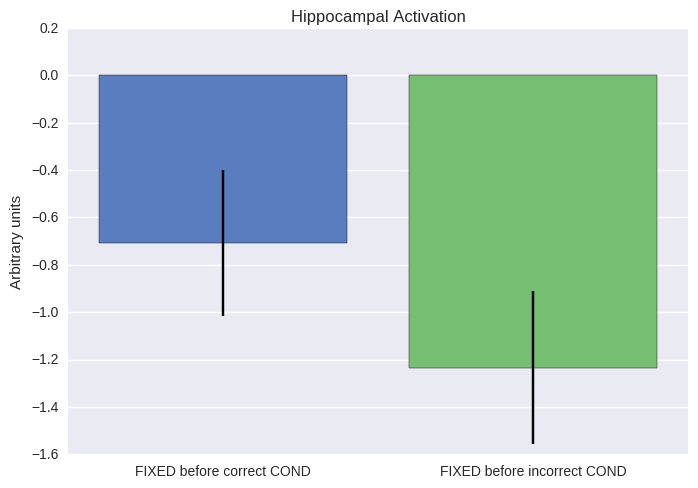

In [18]:
#%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
sns.set_style("darkgrid")


N = 2
conditions = ['FIXED before correct COND', 'FIXED before incorrect COND']
hp_means_allsubjs = [np.mean(all_data_df['hp_all_before_B_corr']), 
                     np.mean(all_data_df['hp_all_before_B_incorr'])]
hp_sem_allsubjs = [stats.sem(all_data_df['hp_all_before_B_corr']), 
                   stats.sem(all_data_df['hp_all_before_B_incorr'])]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = sns.barplot(ind, hp_means_allsubjs, yerr = hp_sem_allsubjs, ecolor = 'black')

ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
#ax.set_xlabel("Trial Type")
ax.set_title("Hippocampal Activation")

plt.show()

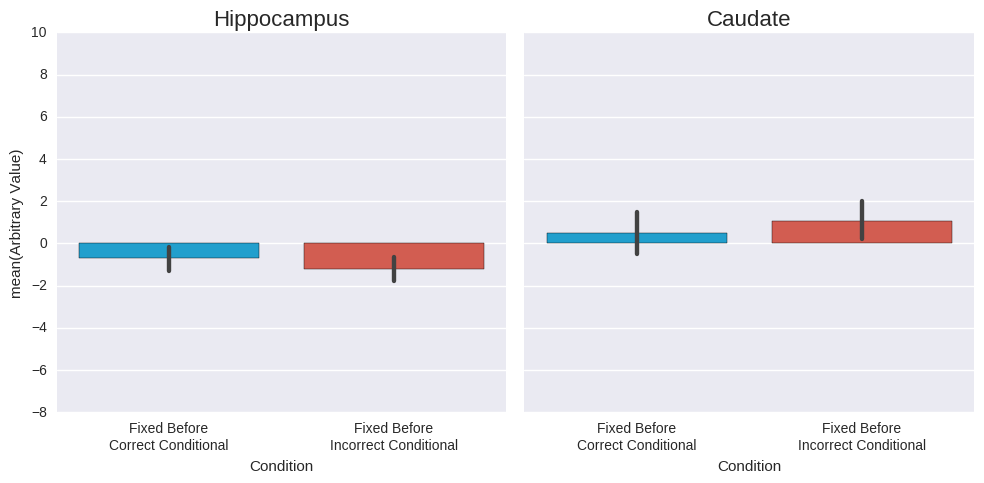

In [21]:
cols = [['hp_all_before_B_corr', 'hp_all_before_B_incorr'],
        ['caudate_all_before_B_corr', 'caudate_all_before_B_incorr']]
rois = ['Hippocampus', 'Caudate']

fig, axes = plt.subplots(ncols = 2, figsize = (10, 5), sharey=True)

for i, roi in enumerate(rois):
    pal = ["#04adea", "#e74c3c"]
    pal = sns.color_palette(pal)
    temp_df = all_data_df[cols[i]]
    temp_df = temp_df.rename(columns={cols[i][0]: 'Fixed Before\nCorrect Conditional',
                                      cols[i][1]: 'Fixed Before\nIncorrect Conditional'})
    temp_df['subject'] = temp_df.index
    temp_df = pd.melt(temp_df, id_vars='subject',
                      value_vars=['Fixed Before\nCorrect Conditional',
                                  'Fixed Before\nIncorrect Conditional'],
                      value_name='Arbitrary Value', var_name='Condition')
    sns.barplot(data=temp_df, x='Condition', y='Arbitrary Value', ax=axes[i], palette=pal)
    axes[i].set_title(roi, fontsize=16)
    axes[i].set_ylim((-8, 10))
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()


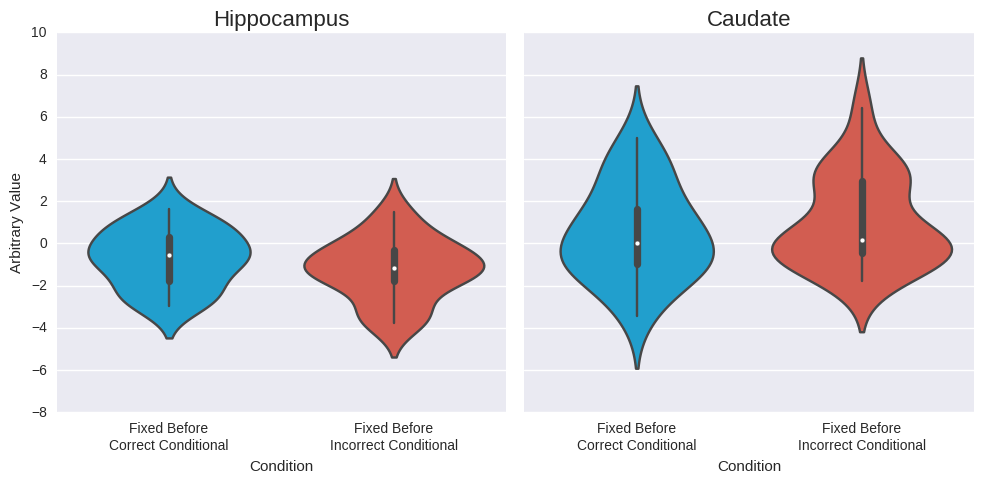

In [17]:
cols = [['hp_all_before_B_corr', 'hp_all_before_B_incorr'],
        ['caudate_all_before_B_corr', 'caudate_all_before_B_incorr']]
rois = ['Hippocampus', 'Caudate']

fig, axes = plt.subplots(ncols = 2, figsize = (10, 5), sharey=True)

for i, roi in enumerate(rois):
    pal = ["#04adea", "#e74c3c"]
    pal = sns.color_palette(pal)
    temp_df = all_data_df[cols[i]]
    temp_df = temp_df.rename(columns={cols[i][0]: 'Fixed Before\nCorrect Conditional',
                                      cols[i][1]: 'Fixed Before\nIncorrect Conditional'})
    temp_df['subject'] = temp_df.index
    temp_df = pd.melt(temp_df, id_vars='subject',
                      value_vars=['Fixed Before\nCorrect Conditional',
                                  'Fixed Before\nIncorrect Conditional'],
                      value_name='Arbitrary Value', var_name='Condition')
    sns.violinplot(data=temp_df, x='Condition', y='Arbitrary Value', ax=axes[i], palette=pal)
    axes[i].set_title(roi, fontsize=16)
    axes[i].set_ylim((-8, 10))
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()


### Caudate Stats

In [7]:
from scipy import stats

print 'all_before_B_corr'
print all_data_df['caudate_all_before_B_corr'].mean()
print 'all_before_B_incorr'
print all_data_df['caudate_all_before_B_incorr'].mean()


print 'T-test: Caudate all_before_B_corr vs. all_before_B_incorr'
print stats.ttest_rel(all_data_df['caudate_all_before_B_corr'], all_data_df['caudate_all_before_B_incorr'])

all_before_B_corr
0.509812266752
all_before_B_incorr
1.0730523248
T-test: Caudate all_before_B_corr vs. all_before_B_incorr
Ttest_relResult(statistic=-1.6181849981711744, pvalue=0.12210370748194102)


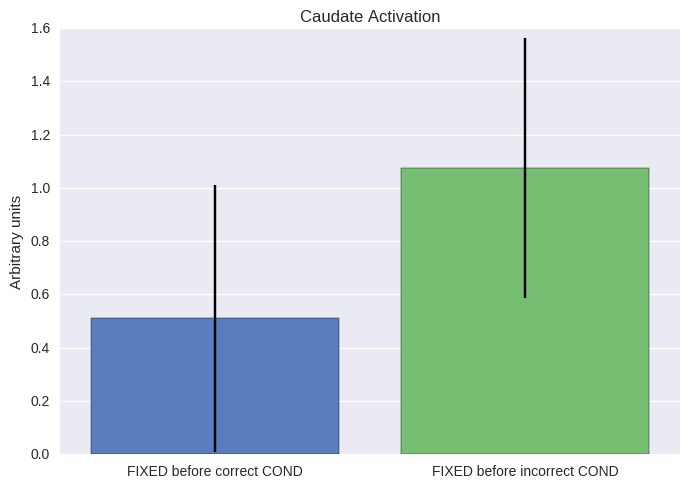

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
sns.set_style("darkgrid")

N = 2
conditions = ['FIXED before correct COND', 'FIXED before incorrect COND']
bar_colors = ['blue']
caudate_means_allsubjs = [all_data_df['caudate_all_before_B_corr'].mean(), 
                          all_data_df['caudate_all_before_B_incorr'].mean()]
caudate_sem_allsubjs = [stats.sem(all_data_df['caudate_all_before_B_corr']), 
                        stats.sem(all_data_df['caudate_all_before_B_incorr'])]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = sns.barplot(ind, caudate_means_allsubjs, yerr = caudate_sem_allsubjs, ecolor = 'black')

ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
#ax.set_xlabel("Trial Type")
ax.set_title("Caudate Activation")

plt.show()

### Putamen Stats

In [11]:
from scipy import stats

print 'all_before_B_corr'
print all_data_df['putamen_all_before_B_corr'].mean()
print 'all_before_B_incorr'
print all_data_df['putamen_all_before_B_incorr'].mean()


print 'T-test: putamen all_before_B_corr vs. all_before_B_incorr'
print stats.ttest_rel(all_data_df['putamen_all_before_B_corr'], all_data_df['putamen_all_before_B_incorr'])

all_before_B_corr
0.539059596136
all_before_B_incorr
-0.149106621463
T-test: putamen all_before_B_corr vs. all_before_B_incorr
Ttest_relResult(statistic=2.4923111306660579, pvalue=0.022095487399451177)


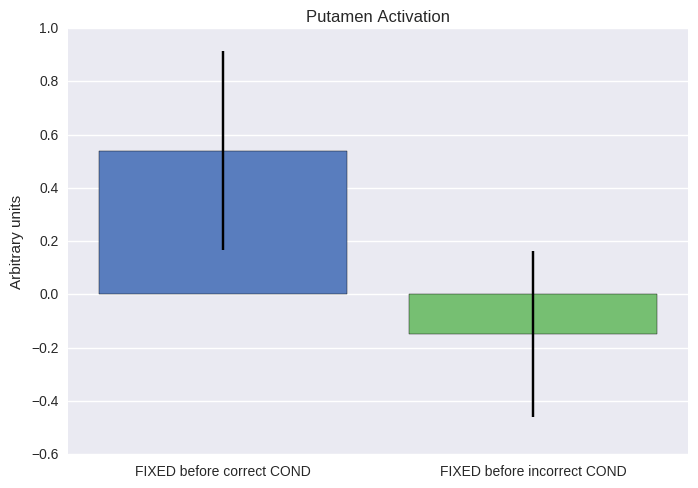

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
sns.set_style("darkgrid")

N = 2
conditions = ['FIXED before correct COND', 'FIXED before incorrect COND']
putamen_means_allsubjs = [all_data_df['putamen_all_before_B_corr'].mean(), 
                          all_data_df['putamen_all_before_B_incorr'].mean()]
putamen_sem_allsubjs = [stats.sem(all_data_df['putamen_all_before_B_corr']), 
                        stats.sem(all_data_df['putamen_all_before_B_incorr'])]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = sns.barplot(ind, putamen_means_allsubjs, yerr = putamen_sem_allsubjs, ecolor = 'black')

ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")

plt.show()